<a href="https://colab.research.google.com/github/jupena01/Homeworks/blob/main/HW_3_Julian_Pena_661979108_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

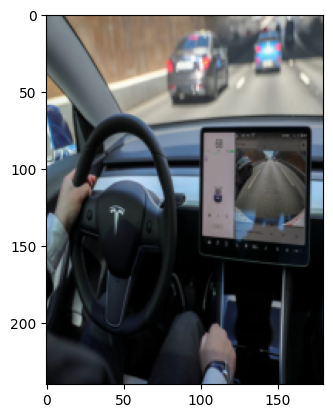

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

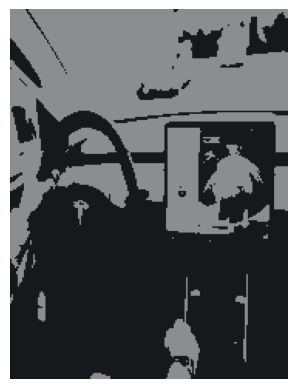

In [ ]:
#Question 1
#I could not copy the link from lms as I could not get access to it even when using the resources module. So I reversed searched the web for the url of the picure.
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans as KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

image = io.imread('https://i.insider.com/60ef4a6661b8600019f17258?width=1300&format=jpeg&auto=webp')
image2 = transform.resize(image,(240,180))
plt.imshow(image2)
plt.show()

pixels = image2.reshape(-1, 3)
krange= range(2,6)
sample_size = 10000
np.random.seed(42)
indices = np.random.choice(range(len(pixels)), min(sample_size, len(pixels)), replace=False)
sample_pixels = pixels[indices]
silhouette_scores = []

for k in krange:
    kmeans = KMeans(n_clusters=k, batch_size=batch_size, random_state=42)
    labels = kmeans.fit_predict(pixels)
    score = silhouette_score(pixels, labels)
    silhouette_scores.append(score)

optimal_K = krange[silhouette_scores.index(max(silhouette_scores))]
kmeans = KMeans(n_clusters=optimal_K, random_state=42)
kmeans.fit(pixels)
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_
segmented_image = np.zeros_like(pixels)

for i in range(len(pixels)):
    segmented_image[i] = cluster_centers[labels[i]]

segmented_image = np.clip(segmented_image, 0, 1)
segmented_image = (segmented_image * 255).astype(np.uint8).reshape(image2.shape)

plt.imshow(segmented_image)
plt.axis('off')
plt.show()


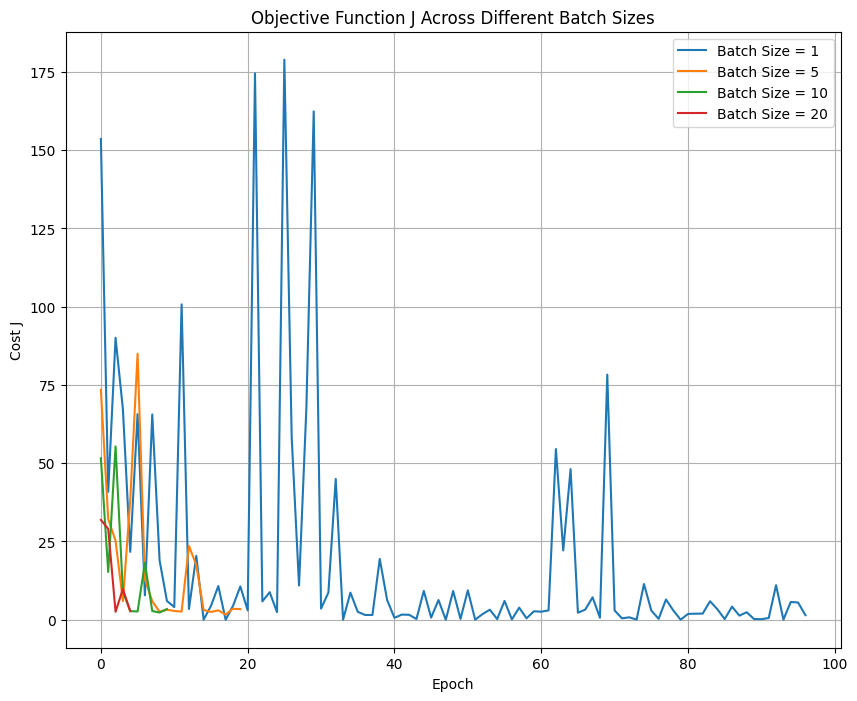

In [ ]:
#Question 2
import numpy as np
import matplotlib.pyplot as plt

data = [
    (6.1101, 17.592), (5.5277, 9.1302), (8.5186, 13.662), (7.0032, 11.854),
    (5.8598, 6.8233), (8.3829, 11.886), (7.4764, 4.3483), (8.5781, 12),
    (6.4862, 6.5987), (5.0546, 3.8166), (5.7107, 3.2522), (14.164, 15.505),
    (5.734, 3.1551), (8.4084, 7.2258), (5.6407, 0.71618), (5.3794, 3.5129),
    (6.3654, 5.3048), (5.1301, 0.56077), (6.4296, 3.6518), (7.0708, 5.3893),
    (6.1891, 3.1386), (20.27, 21.767), (5.4901, 4.263), (6.3261, 5.1875),
    (5.5649, 3.0825), (18.945, 22.638), (12.828, 13.501), (10.957, 7.0467),
    (13.176, 14.692), (22.203, 24.147), (5.2524, -1.22), (6.5894, 5.9966),
    (9.2482, 12.134), (5.8918, 1.8495), (8.2111, 6.5426), (7.9334, 4.5623),
    (8.0959, 4.1164), (5.6063, 3.3928), (12.836, 10.117), (6.3534, 5.4974),
    (5.4069, 0.55657), (6.8825, 3.9115), (11.708, 5.3854), (5.7737, 2.4406),
    (7.8247, 6.7318), (7.0931, 1.0463), (5.0702, 5.1337), (5.8014, 1.844),
    (11.7, 8.0043), (5.5416, 1.0179), (7.5402, 6.7504), (5.3077, 1.8396),
    (7.4239, 4.2885), (7.6031, 4.9981), (6.3328, 1.4233), (6.3589, -1.4211),
    (6.2742, 2.4756), (5.6397, 4.6042), (9.3102, 3.9624), (9.4536, 5.4141),
    (8.8254, 5.1694), (5.1793, -0.74279), (21.279, 17.929), (14.908, 12.054),
    (18.959, 17.054), (7.2182, 4.8852), (8.2951, 5.7442), (10.236, 7.7754),
    (5.4994, 1.0173), (20.341, 20.992), (10.136, 6.6799), (7.3345, 4.0259),
    (6.0062, 1.2784), (7.2259, 3.3411), (5.0269, -2.6807), (6.5479, 0.29678),
    (7.5386, 3.8845), (5.0365, 5.7014), (10.274, 6.7526), (5.1077, 2.0576),
    (5.7292, 0.47953), (5.1884, 0.20421), (6.3557, 0.67861), (9.7687, 7.5435),
    (6.5159, 5.3436), (8.5172, 4.2415), (9.1802, 6.7981), (6.002, 0.92695),
    (5.5204, 0.152), (5.0594, 2.8214), (5.7077, 1.8451), (7.6366, 4.2959),
    (5.8707, 7.2029), (5.3054, 1.9869), (8.2934, 0.14454), (13.394, 9.0551), (5.4369, 0.61705),
]

Z = np.array(data)
X = Z[:, 0].reshape(-1, 1)  # Features (population)
y = Z[:, 1]  # Target variable (housing prices)

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return cost

def minibatch_gradient_descent(X, y, batch_size, alpha, epochs):
    m = len(y)
    theta = np.zeros(X.shape[1])
    cost_history = []

    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        n_batches = int(np.ceil(m / batch_size))

    for i in range(n_batches):
        b_start = i * batch_size
        b_end = (i + 1) * batch_size
        X_batch = X[b_start:b_end]
        y_batch = y[b_start:b_end]

        predictions = X_batch.dot(theta)
        errors = predictions - y_batch

        gradients = (1/m) * X_batch.T.dot(errors)
        theta -= alpha * gradients

        cost = compute_cost(X_batch, y_batch, theta)
        cost_history.append(cost)

    return theta, cost_history

plt.figure(figsize=(10, 8))
batch_sizes = [1, 5, 10, 20]
for batch_size in batch_sizes:
    theta, cost_history = minibatch_gradient_descent(X, y, batch_size, alpha=0.01, epochs=100)
    plt.plot(cost_history, label=f'Batch Size = {batch_size}')

plt.xlabel('Epoch')
plt.ylabel('Cost J')
plt.title('Objective Function J Across Different Batch Sizes')
plt.legend()
plt.grid(True)
plt.show()
#When the batch size is equal to one, the algorithm is essentially performing stochastic gradient descent (SGD).
#With SGD, the model parameters are updated after each training example, so when the batch is one, the plot
#shows significant variance in cost from epoch to epoch, which is characteristic of SGD. This variance is due
#to the fact that each individual training example does not provide a perfect estimate of the gradient of the cost function
#over the entire dataset. The erratic nature of the updates can sometimes help the algorithm to jump out of local minima,
#potentially finding better solutions than batch gradient descent in some cases.

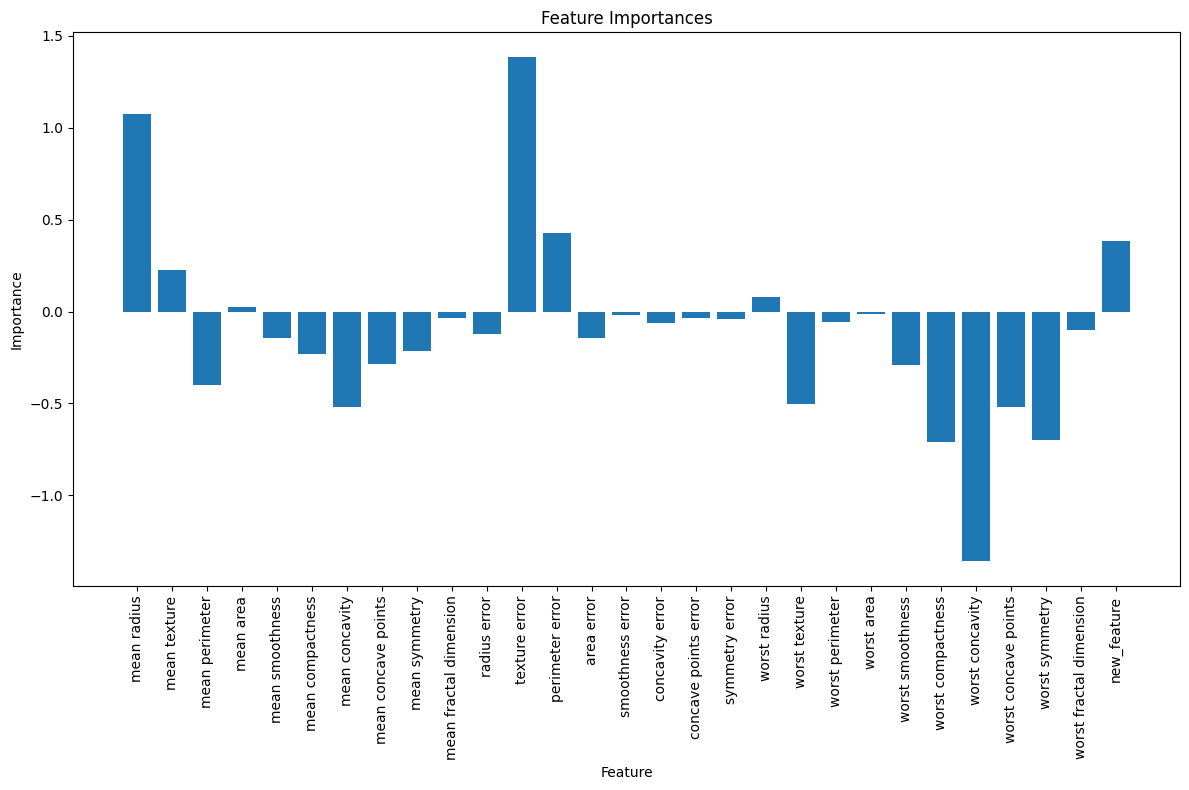

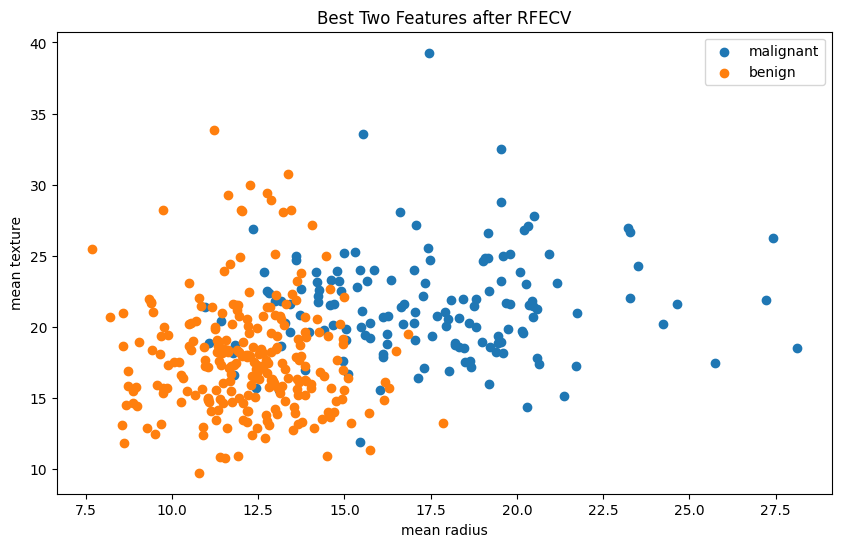

(0.9707602339181286,
 0.9724770642201835,
 0.9814814814814815,
 0.9769585253456222,
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
        18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]))

In [ ]:
#Question 3
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

data = load_breast_cancer()
X = data.data
y = data.target

x1 = np.array(X)
y1 = np.array(y)

new_feature = np.random.rand(x1.shape[0])
new_feature_reshaped = new_feature.reshape(-1, 1)
x2 = np.hstack((x1, new_feature_reshaped))


X_train, X_test, y_train, y_test = train_test_split(x2, y1, test_size=0.3, random_state=42)
logreg = LogisticRegression(max_iter=5000, random_state=42)
rfecv = RFECV(estimator=logreg, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train, y_train)

X_train_rfecv = rfecv.transform(X_train)
X_test_rfecv = rfecv.transform(X_test)

logreg.fit(X_train_rfecv, y_train)
y_pred = logreg.predict(X_test_rfecv)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

feature_ranks = rfecv.ranking_
best_features_indices = np.where(feature_ranks == 1)[0]

selected_features = np.where(rfecv.support_)[0]
n_selected_features = len(selected_features)

extended_feature_names = np.append(data.feature_names, 'new_feature')
selected_feature_names = extended_feature_names[rfecv.support_]

plt.figure(figsize=(12, 8))
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.bar(range(len(selected_feature_names)), rfecv.estimator_.coef_[0], align='center')
plt.xticks(range(len(selected_feature_names)), selected_feature_names, rotation=90)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
for i, label in enumerate(np.unique(y)):
    plt.scatter(X_train[y_train == label, best_features_indices[0]],
                X_train[y_train == label, best_features_indices[1]],
                label=data.target_names[label])

plt.xlabel(data.feature_names[best_features_indices[0]])
plt.ylabel(data.feature_names[best_features_indices[1]])
plt.legend()
plt.title('Best Two Features after RFECV')
plt.show()

accuracy, precision, recall, f1, best_features_indices


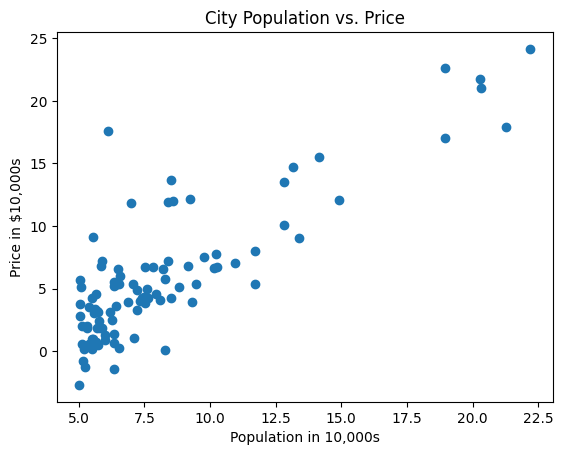

Epoch 1/1000
3/3 [==============================] - 0s 65ms/step - loss: 19.8774 - val_loss: 12.8869
Epoch 2/1000
3/3 [==============================] - 0s 11ms/step - loss: 13.9815 - val_loss: 11.5995
Epoch 3/1000
3/3 [==============================] - 0s 11ms/step - loss: 11.9233 - val_loss: 15.9912
Epoch 4/1000
3/3 [==============================] - 0s 11ms/step - loss: 14.2625 - val_loss: 12.6239
Epoch 5/1000
3/3 [==============================] - 0s 15ms/step - loss: 12.2604 - val_loss: 11.5589
Epoch 6/1000
3/3 [==============================] - 0s 12ms/step - loss: 11.8149 - val_loss: 11.6442
Epoch 7/1000
3/3 [==============================] - 0s 11ms/step - loss: 11.8299 - val_loss: 11.5948
Epoch 8/1000
3/3 [==============================] - 0s 11ms/step - loss: 12.0268 - val_loss: 11.6297
Epoch 9/1000
3/3 [==============================] - 0s 13ms/step - loss: 12.1004 - val_loss: 11.6698
Epoch 10/1000
3/3 [==============================] - 0s 12ms/step - loss: 12.0873 - val_los

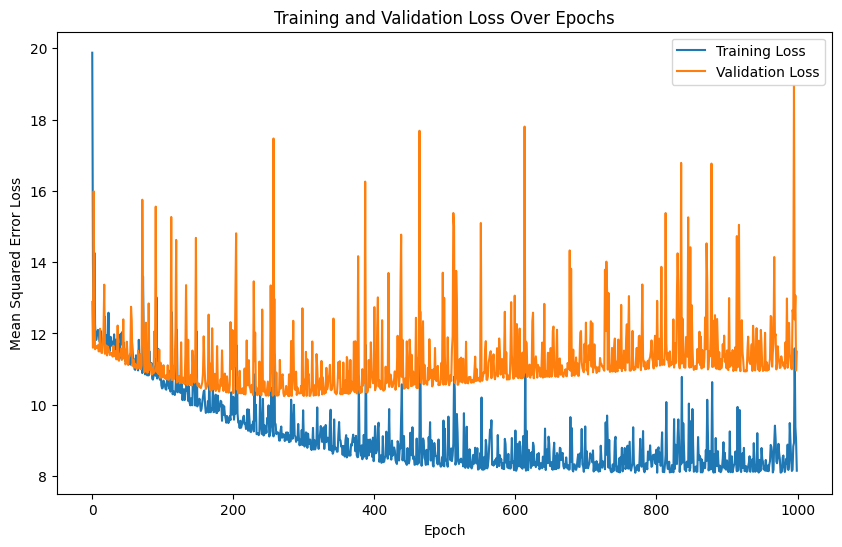

Predicted housing price for a city with a population of 165,000: 210.5364532470703
R^2 score on training data: 0.7331776280330065
R^2 score on validation data: 0.5824789997135329


In [ ]:
#Question 4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = [
    (6.1101, 17.592), (5.5277, 9.1302), (8.5186, 13.662), (7.0032, 11.854),
    (5.8598, 6.8233), (8.3829, 11.886), (7.4764, 4.3483), (8.5781, 12),
    (6.4862, 6.5987), (5.0546, 3.8166), (5.7107, 3.2522), (14.164, 15.505),
    (5.734, 3.1551), (8.4084, 7.2258), (5.6407, 0.71618), (5.3794, 3.5129),
    (6.3654, 5.3048), (5.1301, 0.56077), (6.4296, 3.6518), (7.0708, 5.3893),
    (6.1891, 3.1386), (20.27, 21.767), (5.4901, 4.263), (6.3261, 5.1875),
    (5.5649, 3.0825), (18.945, 22.638), (12.828, 13.501), (10.957, 7.0467),
    (13.176, 14.692), (22.203, 24.147), (5.2524, -1.22), (6.5894, 5.9966),
    (9.2482, 12.134), (5.8918, 1.8495), (8.2111, 6.5426), (7.9334, 4.5623),
    (8.0959, 4.1164), (5.6063, 3.3928), (12.836, 10.117), (6.3534, 5.4974),
    (5.4069, 0.55657), (6.8825, 3.9115), (11.708, 5.3854), (5.7737, 2.4406),
    (7.8247, 6.7318), (7.0931, 1.0463), (5.0702, 5.1337), (5.8014, 1.844),
    (11.7, 8.0043), (5.5416, 1.0179), (7.5402, 6.7504), (5.3077, 1.8396),
    (7.4239, 4.2885), (7.6031, 4.9981), (6.3328, 1.4233), (6.3589, -1.4211),
    (6.2742, 2.4756), (5.6397, 4.6042), (9.3102, 3.9624), (9.4536, 5.4141),
    (8.8254, 5.1694), (5.1793, -0.74279), (21.279, 17.929), (14.908, 12.054),
    (18.959, 17.054), (7.2182, 4.8852), (8.2951, 5.7442), (10.236, 7.7754),
    (5.4994, 1.0173), (20.341, 20.992), (10.136, 6.6799), (7.3345, 4.0259),
    (6.0062, 1.2784), (7.2259, 3.3411), (5.0269, -2.6807), (6.5479, 0.29678),
    (7.5386, 3.8845), (5.0365, 5.7014), (10.274, 6.7526), (5.1077, 2.0576),
    (5.7292, 0.47953), (5.1884, 0.20421), (6.3557, 0.67861), (9.7687, 7.5435),
    (6.5159, 5.3436), (8.5172, 4.2415), (9.1802, 6.7981), (6.002, 0.92695),
    (5.5204, 0.152), (5.0594, 2.8214), (5.7077, 1.8451), (7.6366, 4.2959),
    (5.8707, 7.2029), (5.3054, 1.9869), (8.2934, 0.14454), (13.394, 9.0551), (5.4369, 0.61705),
]

df = pd.DataFrame(data, columns=['Population_10Ks', 'Price_10Ks'])

plt.scatter(df['Population_10Ks'], df['Price_10Ks'])
plt.xlabel('Population in 10,000s')
plt.ylabel('Price in $10,000s')
plt.title('City Population vs. Price')
plt.show()

Z = np.array(data)
X = Z[:, 0].reshape(-1, 1)  # Features (population)
y = Z[:, 1]  # Target variable (housing prices)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

model = keras.Sequential([
    keras.layers.Dense(2, activation='relu', input_shape=(1,)),
    keras.layers.Dense(1)
])

model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001), loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_val, y_val), verbose=1)

population_to_predict = np.array([[165]])
predicted_price = model.predict(population_to_predict)

y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
r2_train = r2_score(y_train, y_pred_train)
r2_val = r2_score(y_val, y_pred_val)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

print(f"Predicted housing price for a city with a population of 165,000: {predicted_price[0][0]}")
print(f"R^2 score on training data: {r2_train}")
print(f"R^2 score on validation data: {r2_val}")
#The model needs to be adjusted to improve its generalization to new data, as indicated by the high and erratic validation loss compared to the training loss.